# Visualize Results

## Plot histogram <a name='histogram'></a>

The following function visualizes the data from a quantum circuit executed on a system or simulator.

`plot_histogram(data)`

For example, make a two-qubit Bell state:

In [1]:
from qiskit_aer import Aer

from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram

In [2]:
# quantum circuit to make a Bell state
bell = QuantumCircuit(2)
bell.h(0)
bell.cx(0, 1)
bell.measure_all()

# execute the quantum circuit
backend = Aer.get_backend("qasm_simulator")  # the device to run on
counts = backend.run(bell, shots=1000).result().get_counts(bell)
print(counts)

{'00': 519, '11': 481}


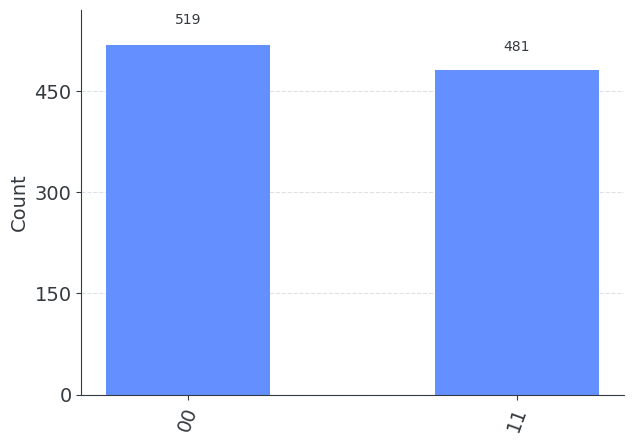

In [3]:
plot_histogram(counts)

### Options when plotting a histogram

Use the following options for `plot_histogram()` to adjust the output graph.

* `legend`: Provides a label for the executions. It takes a list of strings used to label each execution's results. This is mostly useful when plotting multiple execution results in the same histogram
* `sort`: Adjusts the order the bars in the histogram are rendered. It can be set to either ascending order with `asc` or descending order with `desc`
* `number_to_keep`: Takes an integer for the number of terms to show. The rest are grouped together in a single bar called "rest"
* `color`: Adjusts the color of the bars; takes a string or a list of strings for the colors to use for the bars for each execution.
* `bar_labels`: Adjusts whether labels are printed above the bars
* `figsize`: Takes a tuple of the size in inches to make the output figure

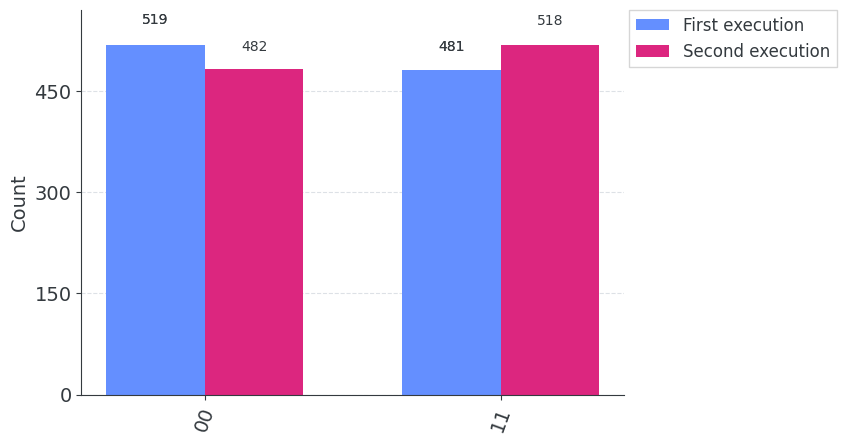

In [4]:
# Execute two-qubit Bell state again
second_result = backend.run(bell, shots=1000).result()
second_counts = second_result.get_counts(bell)

# Plot results with legend
legend = ["First execution", "Second execution"]
plot_histogram([counts, second_counts], legend=legend)

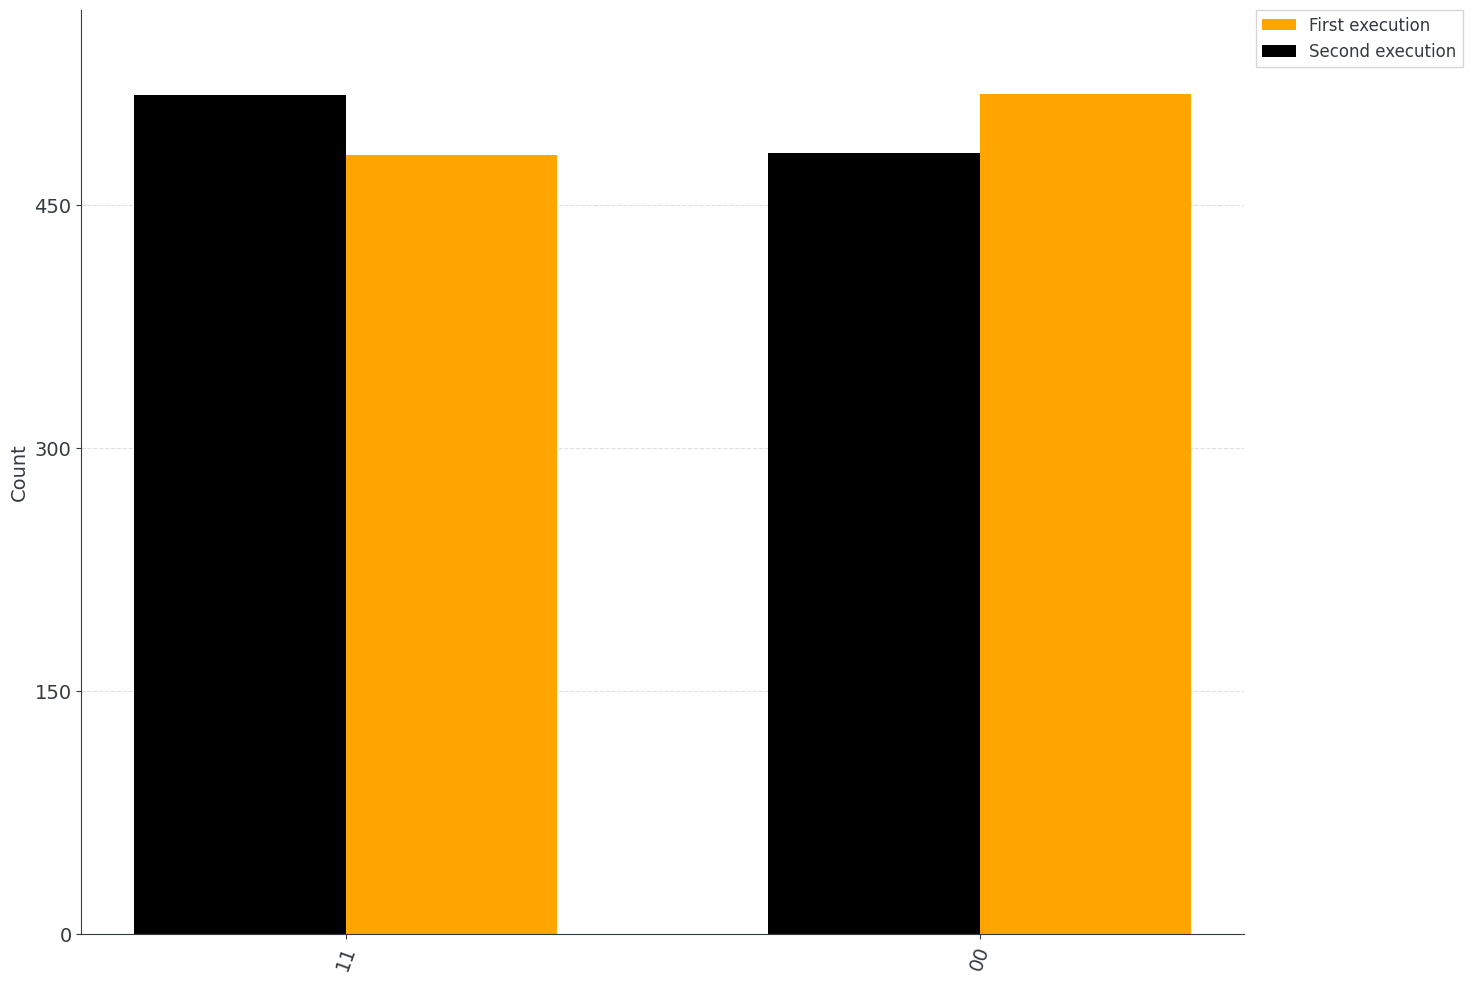

In [5]:
plot_histogram(
    [counts, second_counts],
    legend=legend,
    sort="desc",
    figsize=(15, 12),
    color=["orange", "black"],
    bar_labels=False,
)

### Use the output from plot_histogram()

The `plot_histogram()` function returns a `matplotlib.Figure` which Jupyter notebooks understand and display below the cell. When running outside of Jupyter, use `matplotlib.Figure` methods to display and save the visualization. Calling `.show()` on the returned object from `plot_histogram()` opens the image in a new window (assuming your configured matplotlib backend is interactive). Alternatively, calling `.savefig('out.png')` saves the figure to `out.png`. The `savefig()` method takes a path so you can adjust the location and filename where you're saving the output.